In [13]:
from implementations import *
from data_cleanup import *
from functools import partial
np.warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

Test data cleaning functions

In [15]:
tX = undefined_to_nans(tX)
tX = nans_to_means(tX)
tX = remove_zscore_outliers(tX)
tX, y = remove_nans(tX, y)
y[y == -1] = 0
print(tX.shape, y.shape)

(210385, 30) (210385,)


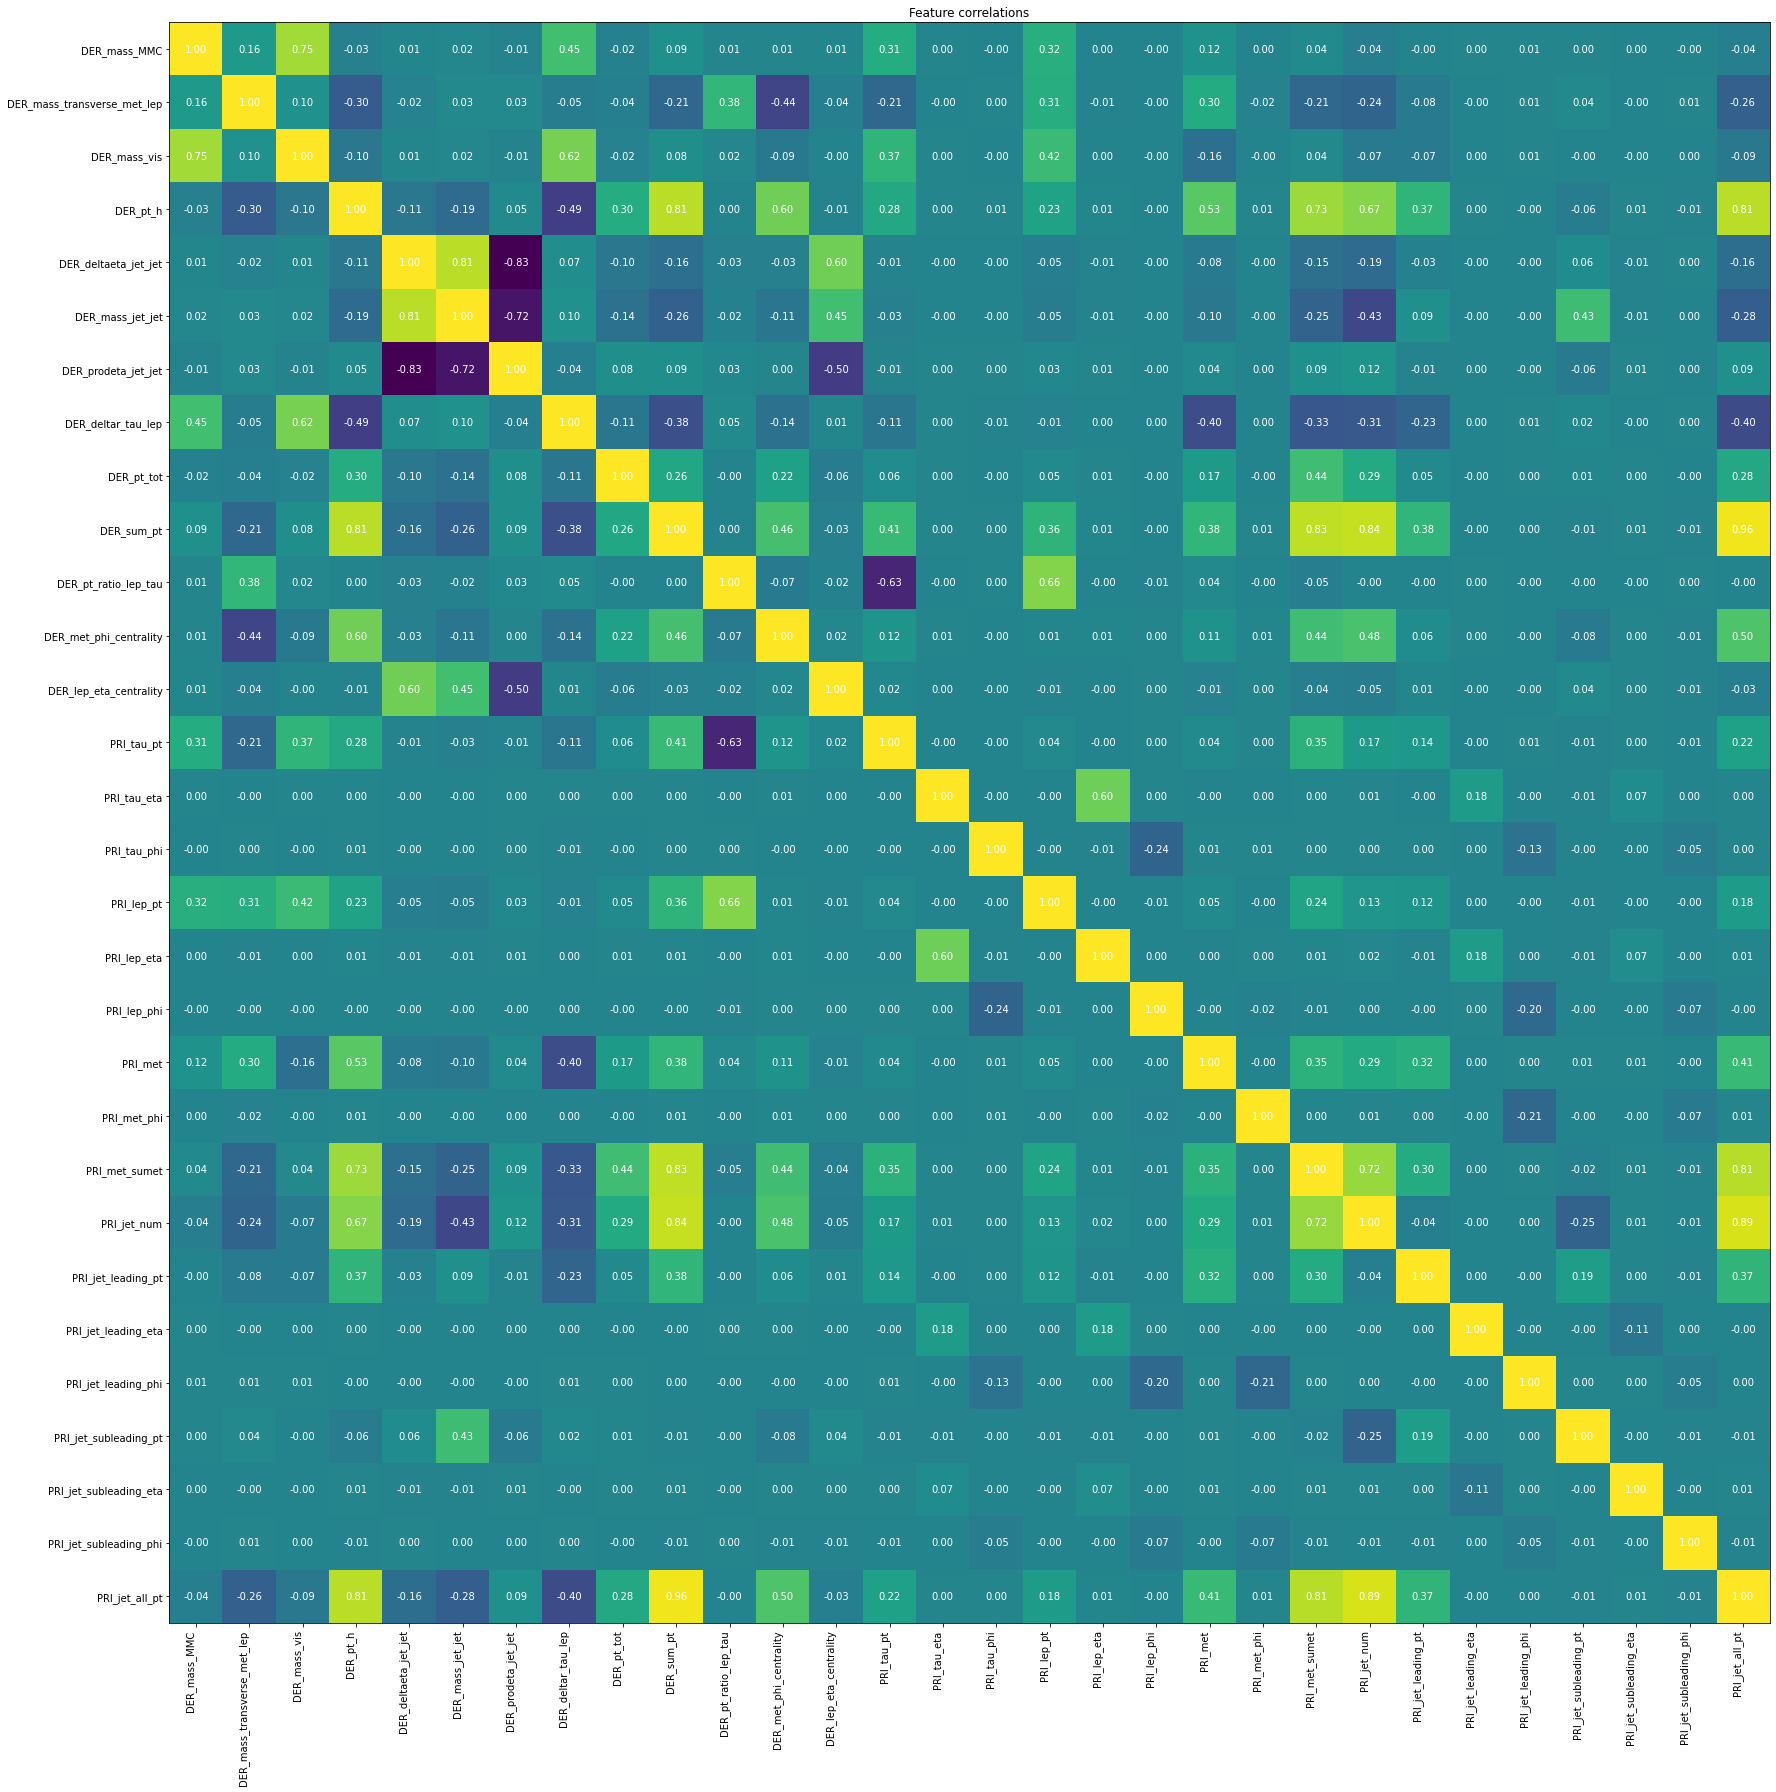

In [16]:
plot_correlation_heatmap(tX)

In [17]:
initial_w = np.zeros(30)
gamma = 0.01
max_iters = 10
batch_size = 10000
ratio = 0.8

Test logistic regression using Newton method

In [18]:
w , loss = logistic_regression_newton_method(y, tX, initial_w, max_iters,batch_size, ratio, gamma)

epoch: 0, train_loss: 69899.28268174591, test_loss: 17642.53003169339, test accuracy: 0.7576348123678018
epoch: 1, train_loss: 62988.74485332274, test_loss: 15985.038559931221, test accuracy: 0.7580625995199277
epoch: 2, train_loss: 57671.44213724185, test_loss: 14701.253058166643, test accuracy: 0.7585854504836371
epoch: 3, train_loss: 53513.969773137054, test_loss: 13687.193983300122, test accuracy: 0.759013237635763
epoch: 4, train_loss: 50198.34868901414, test_loss: 12876.903640176604, test accuracy: 0.7593221950234095
epoch: 5, train_loss: 47537.44918658498, test_loss: 12222.726314088406, test accuracy: 0.7600114076573901
epoch: 6, train_loss: 45380.610921923624, test_loss: 11690.842111924012, test accuracy: 0.7599638757515983
epoch: 7, train_loss: 43625.587771326835, test_loss: 11257.738476562794, test accuracy: 0.7599638757515983
epoch: 8, train_loss: 42187.48173073063, test_loss: 10902.707284526805, test accuracy: 0.7603203650450365
epoch: 9, train_loss: 41010.86281289771, test

In [19]:
dummy_x = np.random.rand(100,3)
dummy_y = np.random.randint(2, size=100)
dummy_w = np.random.rand(3)

Test cross validation

In [20]:
model = partial(logistic_regression_newton_method, initial_w = dummy_w, max_iters = 1, batch_size = 3, ratio = 1, gamma = gamma)
loss = compute_cross_entropy_loss
cross_validation_score(model, dummy_x , dummy_y, loss, cv=10, seed=1)


(array([56.3245671 , 60.61212019, 38.63844546,         nan, 47.65792721,
        53.18184157, 49.67965258, 56.22445997,         nan, 39.52370458]),
 array([10.1623112 ,  9.26797851,  5.82446841,         nan,  4.99288266,
         5.97836005,  4.09995075,  4.8679469 ,         nan,  3.79030706]))

In [21]:
cross_validation_score(least_squares, dummy_x , dummy_y, compute_mse, cv=10, seed=1)

(array([0.24902959, 0.24784201, 0.25177612, 0.26044077, 0.24703804,
        0.26202961, 0.25630501, 0.27068314, 0.25337535, 0.25488585]),
 array([0.16276925, 0.17203217, 0.1538825 , 0.11151261, 0.18063997,
        0.10554787, 0.13838861, 0.06695393, 0.1435896 , 0.14263828]))

testing least square and ridge

In [22]:
ridge_regression(dummy_y, dummy_x, 0.5)
least_squares(dummy_y, dummy_x)

(array([0.30557284, 0.39764686, 0.25265336]), 0.2563415255750497)

Create submission

In [23]:
OUTPUT_PATH = 'data/test.csv' 
_, tX_test, ids_test = load_csv_data(OUTPUT_PATH)
y_test = predict_logistic_labels(w, tX_test)
y_test = y_test * 2 - 1

create_csv_submission(ids_test, y_test, 'bkm.csv')
